# This note is for knowledge collection and for the greatness of Bitcoin

## About DataFrame

### DataFrame Creation, the parameters

In [4]:
import pandas as pd

In [8]:
# The most commonly used, create a empty DataFrame with something in its column
test = pd.DataFrame(columns = ['first', 'second', 'third'])
test

,first,second,third


In [14]:
data = {
    'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada'],
    'year': [2000, 2001, 2002, 2001, 2002],
    'pop': [1.5, 1.7, 3.6, 2.4, 2.9]
}
frame = pd.DataFrame(data)    # the parameter can be a dict
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [11]:
# use 'index' and 'columns' to create, index is now in the column list, you need to use reset_index() 
# to reset the index column to be the first columns
frame2 = pd.DataFrame(data, index=['one', 'two', 'three', 'four', 'five'], columns=[
                      'year', 'state', 'pop', 'debt'])
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN


In [15]:
# out put is an array of the pd's content 
frame2.values

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, nan],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, nan],
       [2002, 'Nevada', 2.9, nan]], dtype=object)

### Read Csv, Read File

In [19]:
# You can read a local CSV, or also an online csv file which will be downloaded into your memory
pd.read_csv(r"C:\Users\handsomevictor\Desktop\股票自己的机器学习基础\demo3.csv").head(2)

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 1 million population,Cases - newly reported in last 7 days,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 1 million population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,NaN,79062802,10128.062466,4160802,482599,1751311,224.345542,74261,8077,NaN
1,United States of America,Americas,18648989,56340.910000,1334155,145489,328014,990.970000,16864,1692,Community transmission


In [22]:
# An online file also works, which doesn't require you to download
pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-table-data.csv').head(2)

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 1 million population,Cases - newly reported in last 7 days,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 1 million population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,NaN,79232555,10149.808077,4068621,434779,1754493,224.753161,72730,7393,NaN
1,United States of America,Americas,18648989,56340.910000,1334155,145489,328014,990.970000,16864,1692,Community transmission


In [28]:
# For the parameters in read_csv, I recommend just read it and process it later in the compiler, but will teach here
# header: 默认第一行为columns，如果指定header=None，则表明没有索引行，第一行就是数据
# index_col: 默认作为索引的为第一列，可以设为index_col为-1，表明没有索引列
# nrows: 表明读取的行数
# sep或delimiter: 分隔符，read_csv默认是逗号，而read_table默认是制表符\t
# encoding: coding format

# Summary:
# 1. csv文件有表头并且是第一行，那么names和header都无需指定;
# 2. csv文件有表头、但表头不是第一行，可能从下面几行开始才是真正的表头和数据，这个时候指定header即可;
# 3. csv文件没有表头，全部是纯数据，那么我们可以通过names手动生成表头;
# 4. csv文件有表头、但是这个表头你不想用，这个时候同时指定names和header。先用header选出表头和数据，然后
#    再用names将表头替换掉，其实就等价于将数据读取进来之后再对列名进行rename;

pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-table-data.csv', header=None).head(2) 
# 'None' means all the data is content so no first row in front
# header = k means the k+1 row will be the header row

,0,1,2,3,4,5,6,7,8,9,10
0,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 1 million population,Cases - newly reported in last 7 days,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 1 million popula...,Deaths - newly reported in last 7 days,Deaths - newly reported in last 24 hours,Transmission Classification
1,Global,NaN,79232555,10149.808077180749,4068621,434779,1754493,224.75316140893204,72730,7393,NaN


In [44]:
# 'index_col' means which column you want to set as the index column. Setting it 1 means putting the 
# second column as its index column but it does not delete any columns, it just change their order
pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-table-data.csv', index_col=1).head(2)

,Name,Cases - cumulative total,Cases - cumulative total per 1 million population,Cases - newly reported in last 7 days,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 1 million population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 24 hours,Transmission Classification
WHO Region,,,,,,,,,,
NaN,Global,79232555,10149.808077,4068621,434779,1754493,224.753161,72730,7393,NaN
Americas,United States of America,18648989,56340.910000,1334155,145489,328014,990.970000,16864,1692,Community transmission


In [62]:
# nrows is very useful when handling very large documents that your memory can not fit
pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-table-data.csv', nrows = 2)

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 1 million population,Cases - newly reported in last 7 days,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 1 million population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,NaN,79232555,10149.808077,4068621,434779,1754493,224.753161,72730,7393,NaN
1,United States of America,Americas,18648989,56340.910000,1334155,145489,328014,990.970000,16864,1692,Community transmission


In [ ]:
# 'sep' or 'delimiter'
# Usually you don't need to care about it, but when you find the imported csv file doesn't seem good and it's a mess,
# it's probably the csv deliminator setting's problem. Go check your .csv file's setting first, or add the parameter:
# pd.read_csv(location, sep = '\t')

In [46]:
# usecols
# 如果列有很多，而我们不想要全部的列、而是只要指定的列就可以使用这个参数
pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-table-data.csv', usecols=['WHO Region', 'Name']).head(2)
# But this will not change the order of columns

,Name,WHO Region
0,Global,NaN
1,United States of America,Americas


In [53]:
# Also we can determine the input data their type by adding 'dtypes'
pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-table-data.csv', dtype = {'Name': str}).dtypes
# It's using curly bracket! {}!!

Name                                                   object
WHO Region                                             object
Cases - cumulative total                                int64
Cases - cumulative total per 1 million population     float64
Cases - newly reported in last 7 days                   int64
Cases - newly reported in last 24 hours                 int64
Deaths - cumulative total                               int64
Deaths - cumulative total per 1 million population    float64
Deaths - newly reported in last 7 days                  int64
Deaths - newly reported in last 24 hours                int64
Transmission Classification                            object
dtype: object

In [ ]:
# 如果csv的分隔符为空白字符的话，那么可以指定delim_whitespace=True，也可以指定sep=r"\s+"

In [57]:
# 可以直接在读取数据的时候对数据进行转换
pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-table-data.csv', converters={"Name": lambda x: str(x) + 'hhhhh'}).head(2)
# Remember it's also in curly bracket! {}!

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 1 million population,Cases - newly reported in last 7 days,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 1 million population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 24 hours,Transmission Classification
0,Globalhhhhh,NaN,79232555,10149.808077,4068621,434779,1754493,224.753161,72730,7393,NaN
1,United States of Americahhhhh,Americas,18648989,56340.910000,1334155,145489,328014,990.970000,16864,1692,Community transmission


In [59]:
# 可以直接指定columns里的数值，如果等于某个值则直接改为False或者True
# 下面这个并没有替换成功，原因在下面
pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-table-data.csv',
            true_values=["Global"], false_values=["United States of America"]).head(2)
# 但是！！注意这里的替换规则，只有当某一列的数据全部出现在true_values + false_values里面，才会被替换

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 1 million population,Cases - newly reported in last 7 days,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 1 million population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,NaN,79232555,10149.808077,4068621,434779,1754493,224.753161,72730,7393,NaN
1,United States of America,Americas,18648989,56340.910000,1334155,145489,328014,990.970000,16864,1692,Community transmission


In [63]:
# 新知识
# 在读取csv的时候，pandas也是要根据数据来判断每一列的类型的。但pandas主要是靠"猜"的方法，因为在读取csv的时候是分块读取的，
# 每读取一块的时候，会根据数据来判断每一列是什么类型；然后再读取下一块，会再对类型进行一个判断，得到每一列的类型，如果得到的
# 结果和上一个块得到结果不一样，那么就会发出警告，提示有以下的列存在多种数据类型：
# 而为了保证正常读取，那么会把类型像大的方向兼容，比如第一个块的user_id被解析成整型，但是在解析第二个块发现user_id有的值无
# 法解析成整型，那么类型整体就会变成字符串，于是pandas提示该列存在混合类型。而一旦设置low_memory=False，那么pandas在读取csv
# 的时候就不分块读了，而是直接将文件全部读取到内存里面，这样只需要对整体进行一次判断，就能得到每一列的类型。但是这种方式也有缺
# 陷，一旦csv过大，就会内存溢出。
pd.read_csv('https://covid19.who.int/WHO-COVID-19-global-table-data.csv',
            low_memory=False).head(2)

,Name,WHO Region,Cases - cumulative total,Cases - cumulative total per 1 million population,Cases - newly reported in last 7 days,Cases - newly reported in last 24 hours,Deaths - cumulative total,Deaths - cumulative total per 1 million population,Deaths - newly reported in last 7 days,Deaths - newly reported in last 24 hours,Transmission Classification
0,Global,NaN,79232555,10149.808077,4068621,434779,1754493,224.753161,72730,7393,NaN
1,United States of America,Americas,18648989,56340.910000,1334155,145489,328014,990.970000,16864,1692,Community transmission


In [ ]:
# date_parser
# 是用来配合parse_dates参数的，因为有的列虽然是日期，但没办法直接转化，需要我们指定一个解析格式
# 举例
pd.read_csv('girl.csv', sep="\t", parse_dates=["date"],
            date_parser=lambda x: datetime.strptime(x, "%Y年%m月%d日"))

In [73]:
# 过大的csv应该用iterator: iterator=True
# 分块读入内存，尤其单机处理大文件时会很有用
# chunk = pd.read_csv('girl.csv', sep="\t", iterator=True)

# print(chunk)
# outcome: <pandas.io.parsers.TextFileReader object at 0x000002550189C0A0>

# print(chunk.get_chunk(1))
# print(chunk.get_chunk(2))
# 直到最后一个chunk

# 可以写一个try except来遍历所有的chunk
# 但是一旦遍历完了之后就不能再返回了，就会报错

# chunk = pd.read_csv('girl.csv', sep="\t", chunksize=2)
# 这里也可以直接设置chunk的size，这样的话就不用让电脑自动的设置chunk的大小了

### Inserting images into Notebook

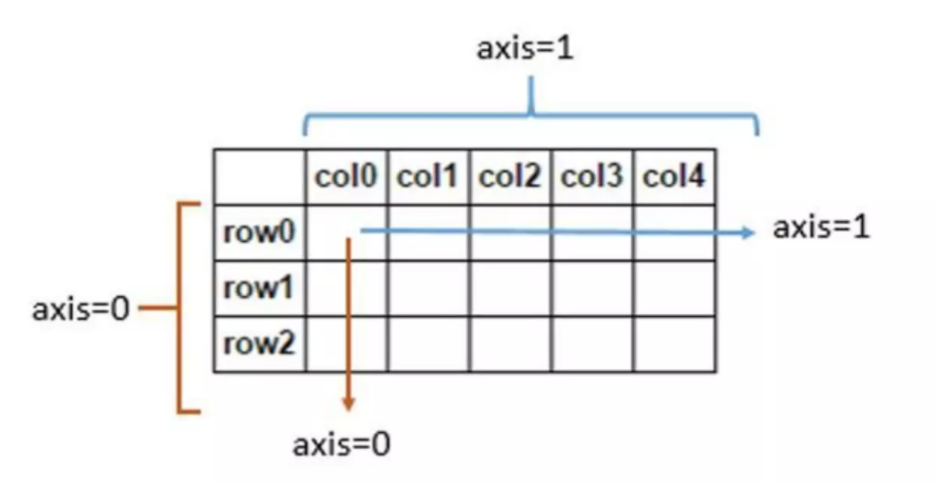

In [41]:
# The first method, use the package IPython.display
from IPython.display import Image
Image(filename = r'C:\Users\handsomevictor\Desktop\python自己的教程\tutorial_dataframe_axis.png', width=300, height=200)

In [82]:
%%html
<img src=r'C:\Users\handsomevictor\Desktop\python自己的教程\tutorial_dataframe_axis.png', width=100, height=60>
# But I don't know why it doesn't appear...

### Axis concept

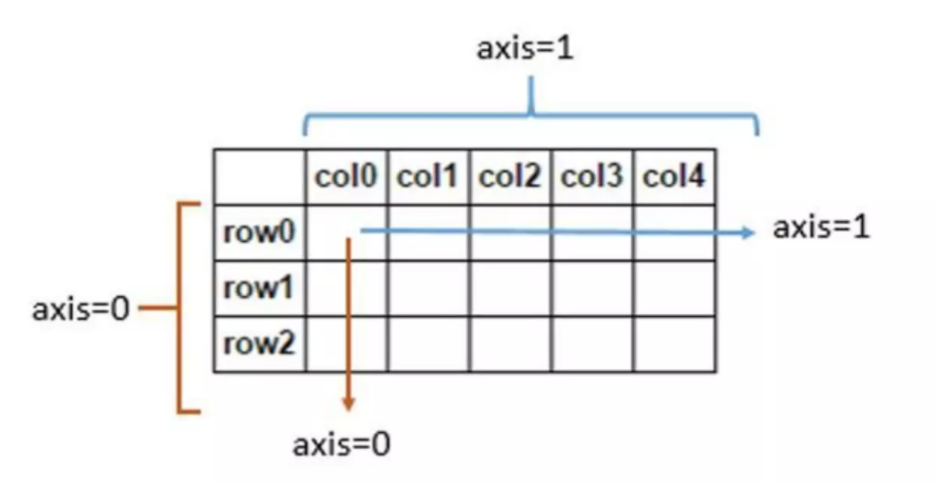

In [42]:
from IPython.display import Image
Image(filename = r'C:\Users\handsomevictor\Desktop\python自己的教程\tutorial_dataframe_axis.png', width=300, height=200)

### DataFrame data manipulation

pd.DataFrame() <p> .loc <p> .iloc <p> Series() <p> np.arange(9).reshape((3,3)) <p> df.drop() <p> df1+df2 <p> np.abs(df) <p> df1.add(df2,fill_value=0) <p> df.apply(lambda) <p> applymap(format) <p> sort_index() <p> sort_values(by=, ascending=True) <p> 

In [91]:
data = pd.DataFrame(np.arange(16).reshape((4,4)),index = ['Ohio','Colorado','Utah','New York'],columns=['one','two','three','four'])
data[['two','three']] 
# 注意这里的slice一定要加两个中括号！因为传入的Parameter应该是一个list!

,two,three
Ohio,1,2
Colorado,5,6
Utah,9,10
New York,13,14


In [93]:
# 可以直接读取符合条件的数据
data[data['three']>5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [95]:
# this will return a Series type Boolean result!
data['three']>5

Ohio        False
Colorado     True
Utah         True
New York     True
Name: three, dtype: bool

In [97]:
data.loc['Colorado',['two','three']]
# 第一个参数是行，第二个是列

two      5
three    6
Name: Colorado, dtype: int32

In [102]:
data.iloc[0:3,2]

Ohio         2
Colorado     6
Utah        10
Name: three, dtype: int32

In [ ]:
# 注意，如果dataframe只有一列了，则自动转化为Series格式！上面的那个就是Series格式！

In [106]:
# 可以用Series进行精确修改数据
print(frame2)
print(30*'*')

val = pd.Series([-1.2,-1.5,-1.7],index=['two','four','five'])
frame2['debt'] = val
print(frame2)

       year   state  pop  debt
one    2000    Ohio  1.5   NaN
two    2001    Ohio  1.7  -1.2
three  2002    Ohio  3.6   NaN
four   2001  Nevada  2.4  -1.5
five   2002  Nevada  2.9  -1.7
******************************
       year   state  pop  debt
one    2000    Ohio  1.5   NaN
two    2001    Ohio  1.7  -1.2
three  2002    Ohio  3.6   NaN
four   2001  Nevada  2.4  -1.5
five   2002  Nevada  2.9  -1.7


In [113]:
# 创建一个随机数填充的DataFrame
frame = pd.DataFrame(np.arange(9).reshape((3,3)),index = ['a','c','d'],columns = ['Ohio','Texas','California'])
print(frame)
print(30*'*')
# 丢掉列
print(frame.drop('a'))
print(30*'*')
# 丢掉行
print(frame.drop('Ohio', axis = 1))
# 这里只要涉及行和列的处理，基本都可以用axis这个参数！

   Ohio  Texas  California
a     0      1           2
c     3      4           5
d     6      7           8
******************************
   Ohio  Texas  California
c     3      4           5
d     6      7           8
******************************
   Texas  California
a      1           2
c      4           5
d      7           8


In [119]:
# DataFrame在进行算术运算时会进行补齐，在不重叠的部分补足NA
df1 = pd.DataFrame(np.arange(9).reshape((3,3)),columns=list('bcd'),index=['Ohio','Texas','Colorado'])
df2 = pd.DataFrame(np.arange(12).reshape((4,3)),columns = list('bde'),index=['Utah','Ohio','Texas','Oregon'])
print(df1)
print(30*'*')
print(df2)
print(30*'*')
print(df1+df2)
print(30*'*')
# 这个不同于merge，merge是会自动把index编程数字。。而且一定要rows一样的时候才最好merge!
print(pd.merge(df1, df2, left_on = 'b', right_on = 'b'))

          b  c  d
Ohio      0  1  2
Texas     3  4  5
Colorado  6  7  8
******************************
        b   d   e
Utah    0   1   2
Ohio    3   4   5
Texas   6   7   8
Oregon  9  10  11
******************************
            b   c     d   e
Colorado  NaN NaN   NaN NaN
Ohio      3.0 NaN   6.0 NaN
Oregon    NaN NaN   NaN NaN
Texas     9.0 NaN  12.0 NaN
Utah      NaN NaN   NaN NaN
******************************
   b  c  d_x  d_y  e
0  0  1    2    1  2
1  3  4    5    4  5
2  6  7    8    7  8


In [120]:
df1 = pd.DataFrame(np.arange(9).reshape((3,3)),columns=list('bcd'),index=['Ohio','Texas','Colorado'])
df2 = pd.DataFrame(np.arange(12).reshape((4,3)),columns = list('bde'),index=['Utah','Ohio','Texas','Oregon'])
df1.add(df2,fill_value=0)
# 可以使用fill_value方法填充NA数据，不过两个df中都为NA的数据，该方法不会填充

,b,c,d,e
Colorado,6.0,7.0,8.0,NaN
Ohio,3.0,1.0,6.0,5.0
Oregon,9.0,NaN,10.0,11.0
Texas,9.0,4.0,12.0,8.0
Utah,0.0,NaN,1.0,2.0


In [124]:
# numpy的元素级数组方法，也可以用于操作Pandas对象
import numpy as np
frame = pd.DataFrame(np.random.randn(3,3),columns=list('bcd'),index=['Ohio','Texas','Colorado'])
print(frame)
print(30*'*')
print(np.abs(frame))
# np.abs()指的是取绝对值

                 b         c         d
Ohio      1.633264  2.950660 -0.834449
Texas     0.534548  0.433660 -0.421196
Colorado -0.332199  0.529825  2.179531
******************************
                 b         c         d
Ohio      1.633264  2.950660  0.834449
Texas     0.534548  0.433660  0.421196
Colorado  0.332199  0.529825  2.179531


In [131]:
# 另一个常见的操作是，将函数应用到由各列或行所形成的一维数组上, DataFrame的apply方法即可实现此功能
print(frame)
print(30*'*')

f = lambda x:x.max() - x.min()
print(frame.apply(f)) # 这样的话就是每一列的最大值减去了最小值

print(30*'*')
print(frame.apply(f,axis=1)) # 这样的话是每一行的最大值减去了最小值

print(30*'*')
def f(x):
    return pd.Series([x.min(),x.max()],index=['min','max'])
print(frame.apply(f)) # 这样的话是返回一个dataframe格式的数据库，然后里面的内容包含了具体的计算结果

# 元素级的Python函数也是可以用的,使用applymap方法
print(30*'*')
format = lambda x:'%.2f'%x # 这个format指的是原df每个数都只取2个小数
print(frame.applymap(format)) 

                 b         c         d
Ohio      1.633264  2.950660 -0.834449
Texas     0.534548  0.433660 -0.421196
Colorado -0.332199  0.529825  2.179531
******************************
b    1.965463
c    2.517000
d    3.013980
dtype: float64
******************************
Ohio        3.785109
Texas       0.955744
Colorado    2.511731
dtype: float64
******************************
            b        c         d
min -0.332199  0.43366 -0.834449
max  1.633264  2.95066  2.179531
******************************
              b     c      d
Ohio       1.63  2.95  -0.83
Texas      0.53  0.43  -0.42
Colorado  -0.33  0.53   2.18


In [136]:
# 对任意列进行排序, sorting
# sort_index可以根据任意轴的索引进行排序，并指定升序降序
frame = pd.DataFrame(np.arange(8).reshape((2,4)),index=['three','one'],columns=['d','a','b','c'])
print(frame.sort_index())

# 上面是sort_index，只能用于对index的排序，因为index不在dataframe的列当中，所以要单独拿出来
# 下面是对普通列进行排序，sort_values()
# df = df.sort_values(by="Deaths" , ascending=False)
# 这个by=也可以不写，直接写列的index也可以！比如sort_values(1 , ascending=False)

       d  a  b  c
one    4  5  6  7
three  0  1  2  3


In [137]:
# df = df.sort_values(by="Deaths" , ascending=False)

### DataFrame 描述统计

corrwith(df[column_name]) <p> df.corr() <p> df.cov() <p> df.corrwith() <p>

In [151]:
# 汇总和计算描述统计
frame = pd.DataFrame(np.random.randn(3,3),columns=list('bcd'),index=['Ohio','Texas','Colorado'])
print(frame.describe()) # DataFrame的汇总统计
print(30*'*')

# 可以直接求和，按照列和行
print(frame.sum(axis=1))
print(30*'*')

# 此时如果有NA则会自动排除，如果不想排除可以skipna禁用该功能
print(frame.mean(axis=1,skipna=False))

# 相关系数矩阵和协方差矩阵
print(30*'*')
print('correlation')
frame1 = pd.DataFrame(np.random.randn(3,3),index=list('abc'),columns=list('abc'))
print(frame1.corr())

print(30*'*')
print('covariance')
print(frame1.cov())

#corrwith用于计算每一列与Series的相关系数
print(30*'*')
print('correlation with certain column')
print(frame1.corrwith(frame1['a']))

              b         c         d
count  3.000000  3.000000  3.000000
mean  -0.085269 -0.058006 -0.072541
std    0.586778  1.358448  0.347988
min   -0.697962 -1.484855 -0.401485
25%   -0.363706 -0.696878 -0.254705
50%   -0.029451  0.091099 -0.107925
75%    0.221077  0.655419  0.091931
max    0.471606  1.219739  0.291788
******************************
Ohio       -1.008348
Texas      -1.222518
Colorado    1.583419
dtype: float64
******************************
Ohio       -0.336116
Texas      -0.407506
Colorado    0.527806
dtype: float64
******************************
correlation
          a         b         c
a  1.000000 -0.071661  0.627576
b -0.071661  1.000000  0.731581
c  0.627576  0.731581  1.000000
******************************
covariance
          a         b         c
a  0.380378 -0.038905  0.333238
b -0.038905  0.774871  0.554445
c  0.333238  0.554445  0.741247
******************************
correlation with certain column
a    1.000000
b   -0.071661
c    0.627576
dtype: float

### DataFrame 处理缺失数据，missing values

np.nan <p> df.dropna() <p> np.random.randint() <p> 

In [168]:
# 去除缺失值

# isnull方法用于判断数据是否为空数据
# fillna方法用于填补缺失数据
# dropna方法用于舍弃缺失数据
# 上面两个方法返回一个新的Series或者DataFrame，对原数据没有影响，如果想在原数据上进行直接修改，使用inplace参数

data = pd.DataFrame([[1, 6.5, 3],
                     [1, np.nan, np.nan],
                     [4, np.nan, np.nan],
                     [6, 6.5, 3]])
# 注意，生成NaN的时候要用np.nan

print(data)
print(30*'*')
print(data.dropna())
# 这里，dropna方法如果发现缺失值，就会进行整行删除，不过可以指定删除的方式，how=all，
# 是当整行全是na的时候才进行删除,同时还可以指定删除的轴：
print(30*'*')
print(data.dropna(how='all', axis=1, inplace=True))

'''
data.dropna(how='all')    # 传入这个参数后将只丢弃全为缺失值的那些行
data.dropna(axis=1)       # 丢弃有缺失值的列（一般不会这么做，这样会删掉一个特征）
data.dropna(axis=1, how="all")   # 丢弃全为缺失值的那些列

data.dropna(axis=0, subset=["Age", "Sex"])   # 丢弃‘Age’和‘Sex’这两列中有缺失值的行
'''

   0    1    2
0  1  6.5  3.0
1  1  NaN  NaN
2  4  NaN  NaN
3  6  6.5  3.0
******************************
   0    1    2
0  1  6.5  3.0
3  6  6.5  3.0
******************************
None


'\ndata.dropna(how=\'all\')    # 传入这个参数后将只丢弃全为缺失值的那些行\ndata.dropna(axis=1)       # 丢弃有缺失值的列（一般不会这么做，这样会删掉一个特征）\ndata.dropna(axis=1, how="all")   # 丢弃全为缺失值的那些列\n\ndata.dropna(axis=0, subset=["Age", "Sex"])   # 丢弃‘Age’和‘Sex’这两列中有缺失值的行\n'

In [186]:
# 填充缺失值
from numpy import NaN
df1=pd.DataFrame([[1,2,3],[NaN,NaN,2],[NaN,NaN,NaN],[8,8,NaN]])
print (df1)
print(30*'*')

#1.用常数填充
print (df1.fillna(100))
print(30*'*')

#2.用字典填充
print(df1.fillna({0:10,1:20,2:30})) # 0列的missing value用10填充，1列的用20
print(30*'*')

# 指定inplace参数
print (df1.fillna(0,inplace=True)) # 这里返回值是None的意思是，运用了inplace之后不创建一个返回值，而是直接更改了原df1!
print (df1)
print(30*'*')

     0    1    2
0  1.0  2.0  3.0
1  NaN  NaN  2.0
2  NaN  NaN  NaN
3  8.0  8.0  NaN
******************************
       0      1      2
0    1.0    2.0    3.0
1  100.0  100.0    2.0
2  100.0  100.0  100.0
3    8.0    8.0  100.0
******************************
      0     1     2
0   1.0   2.0   3.0
1  10.0  20.0   2.0
2  10.0  20.0  30.0
3   8.0   8.0  30.0
******************************
None
     0    1    2
0  1.0  2.0  3.0
1  0.0  0.0  2.0
2  0.0  0.0  0.0
3  8.0  8.0  0.0
******************************


In [188]:
# 指定method参数
# 1.method = 'ffill'/'pad'：用前一个非缺失值去填充该缺失值！！很常用！！时间序列！
df2 = pd.DataFrame(np.random.randint(0,10,(5,5)))
print(df2)
df2.iloc[1:4,3] = NaN
df2.iloc[2:4,4] = NaN
print(30*'*')
print(df2)
print(30*'*')
print('用ffill的结果')
print(df2.fillna(method='ffill'))

#2.method = 'bflii'/'backfill'：用下一个非缺失值填充该缺失值
print(30*'*')
print('用bfill的结果')
print(df2.fillna(method='bfill'))


# 指定limit参数
# 用下一个非缺失值填充该缺失值
# 只填充2个
print(30*'*')
print(df2.fillna(method='bfill', limit=2))

   0  1  2  3  4
0  3  7  9  7  6
1  4  1  2  4  1
2  1  6  8  4  8
3  1  3  5  7  6
4  9  4  9  0  1
******************************
   0  1  2    3    4
0  3  7  9  7.0  6.0
1  4  1  2  NaN  1.0
2  1  6  8  NaN  NaN
3  1  3  5  NaN  NaN
4  9  4  9  0.0  1.0
******************************
用ffill的结果
   0  1  2    3    4
0  3  7  9  7.0  6.0
1  4  1  2  7.0  1.0
2  1  6  8  7.0  1.0
3  1  3  5  7.0  1.0
4  9  4  9  0.0  1.0
******************************
用bfill的结果
   0  1  2    3    4
0  3  7  9  7.0  6.0
1  4  1  2  0.0  1.0
2  1  6  8  0.0  1.0
3  1  3  5  0.0  1.0
4  9  4  9  0.0  1.0
******************************
   0  1  2    3    4
0  3  7  9  7.0  6.0
1  4  1  2  NaN  1.0
2  1  6  8  0.0  1.0
3  1  3  5  0.0  1.0
4  9  4  9  0.0  1.0


     0    1    2    3    4
0  3.0  7.0  9.0  7.0  6.0
1  4.0  1.0  2.0  2.0  1.0
2  1.0  6.0  8.0  8.0  NaN
3  1.0  3.0  5.0  5.0  NaN
4  9.0  4.0  9.0  0.0  1.0


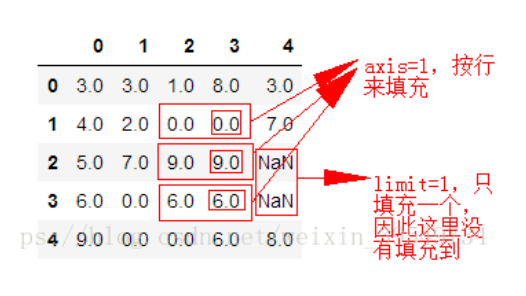

In [192]:
# 指定axis参数
print(df2.fillna(method="ffill", limit=1, axis=1))

# 解释
from IPython.display import Image
Image(filename = r'C:\Users\handsomevictor\Desktop\python自己的教程\tutorial_dataframe_fillna().png', width=300, height=200)

### DataFrame 格式

df.astype(str)

In [ ]:
# astype()可有的参数有比如：
# category
# int64; int32
# str
# float

# df.astype('数据类型')                        
# 改变整个df的数据类型

# df['列名'].astype('数据类型')             
# 仅改变某一列的数据类型

# 改变多列，用list当作parameter!
# app_train[['uid','index']] = app_train[['uid','index']].astype('int')

# 改变多列，用dict来分配每一列的格式
# df.astype({'col1': 'int32', 'col2': 'int64'}).dtypes

# df['Name'] = df['Name'].astype(str)

### DataFrame 列的合并

pd.merge() <p> pd.concat() <p> pd.astype() <p>

In [ ]:
# 比如可以讲两列string格式的合并成一列，直接用string+string即可
# df['user_sku_id'] = df['user_id'].astype(int).astype(str) + '_' + df['sku_id'].astype(str)

### Series 删除重复项

Series.unique() <p>

In [198]:
# 可以这样来创建object格式的series！更快！
s = pd.Series(list("babc"))
print(s)
print(30*'*')

# 删除重复项unique()
s = pd.Series([1, 1, 3, 5, 6, 6, 8, 9, 0, 0, 10])
print(s)
print(30*'*')
s = s.unique()
print(s)
# 注意，这里得到的结果是list！

0    b
1    a
2    b
3    c
dtype: object
******************************
0      1
1      1
2      3
3      5
4      6
5      6
6      8
7      9
8      0
9      0
10    10
dtype: int64
******************************
[ 1  3  5  6  8  9  0 10]
